In [41]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

'''
The titanic data set contains three tables 
(1) train - the training data containing informations for all the passengers: Name, PassengerClass (Pclass), Sex, Age, SibSp, Parch, Ticket Number (Ticket), Fare, Cabin, Port of Embarkment (Embarked)
(2) gender - example prediction output where all the instances are female passengers
(3) test - same format as the training data, but used for 
'''

test = pd.read_csv('data/test.csv')
gender = pd.read_csv('data/gender_submission.csv')
train = pd.read_csv('data/train.csv')


Lets see how many NaN values are there in each feature 

In [42]:
# create a copy of the original dataset
train_clean = train.copy(deep = True)
test_clean = test.copy(deep=True)

print("Numbers of NaN values in training data: \n", train_clean.isnull().sum(), "\nTotal number of variables: ", train_clean.shape[0])
print("\n")
print("Numbers of NaN values in training data: \n", test_clean.isnull().sum(), "\nTotal number of variables: ", test_clean.shape[0])


Numbers of NaN values in training data: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 
Total number of variables:  891


Numbers of NaN values in training data: 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64 
Total number of variables:  418


<h3>
In the Training data, there are a lot of NaN in Age and Cabin
</h3>
- Age is a continuous variable, which means that we can fill it in with mean/median <br>
- Cabin, on the other hand, is a discrete catagorical variable, so we can't just replace its value using existing category; in addition, a majority of the datapoint has a NaN as their Cabin value, so it is not valid to remove those datapoints <br>
<p> 
One solution is to create two versions of the data set: one with Cabin, but with significantly less data, the other without Cabin, but cannot be used to train model that uses Cabin as a feature </p> 

In [43]:
train_clean_with_cabin = train_clean[train_clean['Cabin'].notnull()]
train_clean_with_cabin['Age'].fillna(train_clean_with_cabin['Age'].median(), inplace=True)

train_clean_without_cabin = train_clean.drop(columns=['Cabin'])
train_clean_without_cabin['Age'].fillna(train_clean_without_cabin['Age'].median(), inplace=True)

C:\ProgramData\Miniconda3\lib\site-packages\pandas\core\series.py:4460: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [44]:
'''
EDA + partially cleaning the data
check for NaN (null) data by columns
'''
# because Cabin has poor data quality and we are not interested in Embarked, we can just drop them
# table without Cabin and Embarked 
dropped = train.drop(['Cabin', 'Embarked'], axis=1)

# another version of the table without invalid Age value 
filtered_age = dropped[dropped['Age'].notnull()]
print(filtered_age.info())
print(filtered_age.describe())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 61.4+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   714.000000  714.000000  714.000000  714.000000  714.000000   
mean    448.582633    0.406162    2.236695   29.699118    0.512605   
std     259.119524    0.491460    0.838250   14.526497    0.929783   
min       1.000000    0.000000    1.000000 

In [45]:
test_dropped = test.drop(['Cabin', 'Embarked'], axis=1)

test_filtered_age = test_dropped[test_dropped['Age'].notnull()]
print(test_filtered_age.info())
print(test_filtered_age.describe())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 415
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  332 non-null    int64  
 1   Pclass       332 non-null    int64  
 2   Name         332 non-null    object 
 3   Sex          332 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        332 non-null    int64  
 6   Parch        332 non-null    int64  
 7   Ticket       332 non-null    object 
 8   Fare         331 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 25.9+ KB
None
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   332.000000  332.000000  332.000000  332.000000  332.000000  331.000000
mean   1100.063253    2.144578   30.272590    0.481928    0.397590   40.982087
std     122.763173    0.846283   14.181209    0.874084    0.810651   61.228558
min     892.000000    1.000000    0.170000    0.00

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Count'>

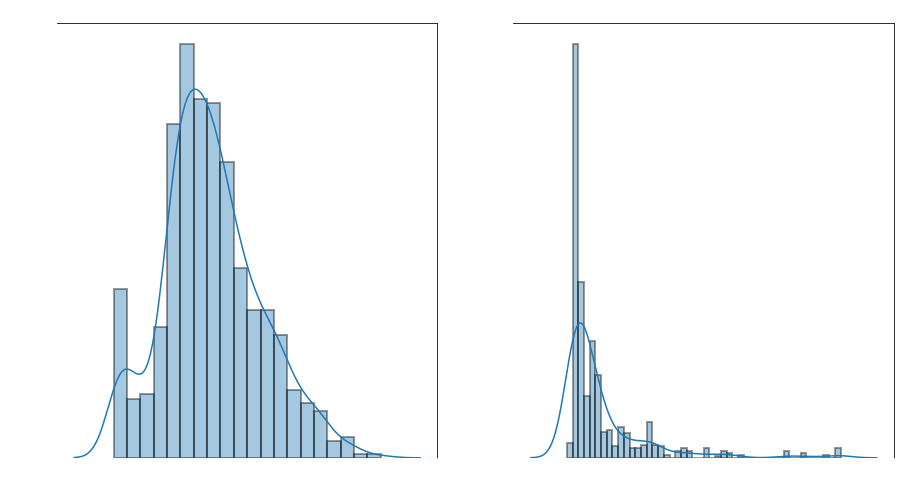

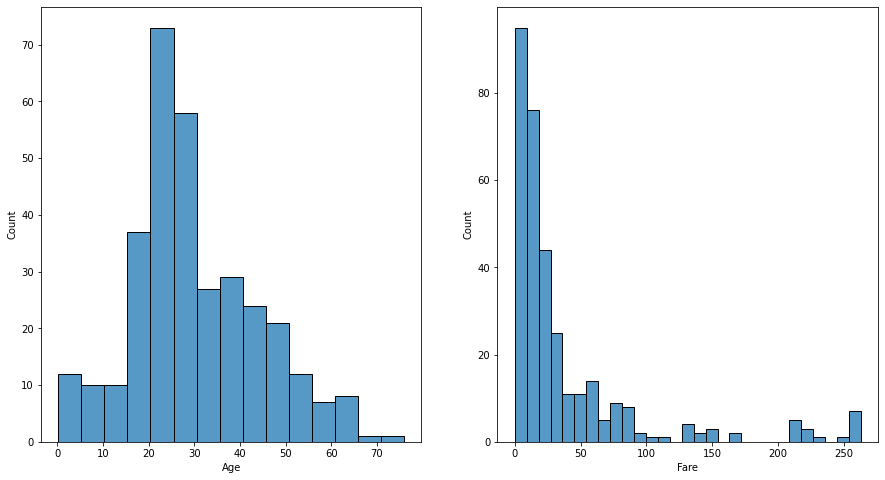

In [92]:
'''
Visualization (Seaborn: https://seaborn.pydata.org/introduction.html)
'''
import seaborn as sns 
sns.color_palette("light:#5A9", as_cmap=True)
# looking at Fare and Age to define their categroy
f, axs = plt.subplots(1, 2, figsize=(15, 8), gridspec_kw=dict(width_ratios=[5, 5]))
axs[0].set_title('Age Distribution', color='white')
axs[0].xaxis.label.set_color('white')
axs[0].yaxis.label.set_color('white')
axs[0].spines['bottom'].set_color('white')
axs[0].spines['left'].set_color('white')
axs[0].tick_params(axis='x', colors='white')
axs[0].tick_params(axis='y', colors='white')
sns.distplot(filtered_age['Age'], ax=axs[0], hist_kws=dict(edgecolor="black", linewidth=2))
axs[1].set_title('Ticket Fare Distribution', color='white')
axs[1].xaxis.label.set_color('white')
axs[1].yaxis.label.set_color('white')
axs[1].spines['bottom'].set_color('white')
axs[1].spines['left'].set_color('white')
axs[1].tick_params(axis='x', colors='white')
axs[1].tick_params(axis='y', colors='white')
sns.distplot(filtered_age['Fare'], ax=axs[1], hist_kws=dict(edgecolor="black", linewidth=2))
plt.savefig('Age_and_Fare_plot')

f, axs = plt.subplots(1, 2, figsize=(15, 8), gridspec_kw=dict(width_ratios=[5, 5]))
sns.histplot(data=test_filtered_age['Age'], ax=axs[0])
sns.histplot(data=test_filtered_age['Fare'], ax=axs[1])

<AxesSubplot:xlabel='Fare', ylabel='Count'>

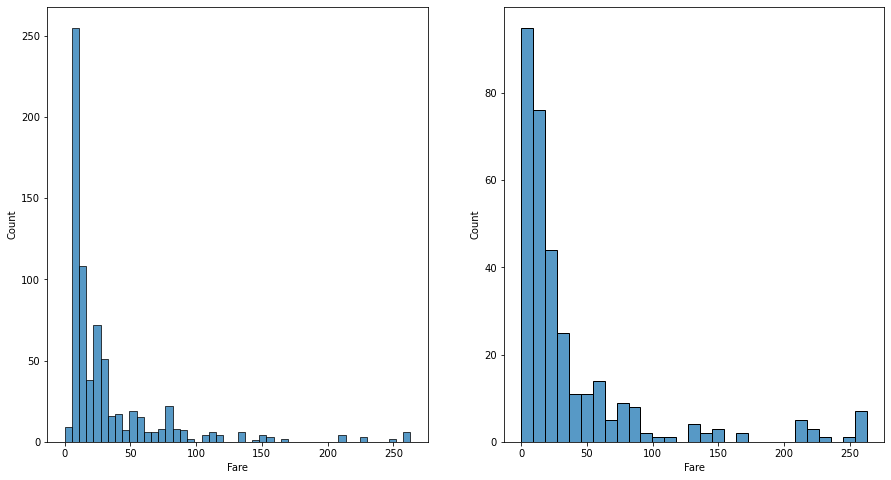

In [47]:
'''
Obivously, Fare has some outliers that need to be removed
'''
f, axs = plt.subplots(1, 2, figsize=(15, 8), gridspec_kw=dict(width_ratios=[5, 5]))

filtered_age = filtered_age[filtered_age["Fare"]<300]
sns.histplot(data=filtered_age['Fare'], ax=axs[0])

test_filtered_age = test_filtered_age[test_filtered_age["Fare"]<300]
sns.histplot(data=test_filtered_age['Fare'], ax=axs[1])



In [48]:
'''
build classifier (Scikit-Learn: https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn)
'''
from sklearn import preprocessing

# first define (encode) the features 
# we are interested in the following features: Sex, Age, passenger class, fare

names = ['Sex', 'Age', 'Pclass', 'Fare']
features = filtered_age[['Sex', 'Age', 'Pclass', 'Fare']].to_numpy()

# training list 
label = filtered_age['Survived'].to_numpy()

# testing features 
test_features = test_filtered_age[['Sex', 'Age', 'Pclass', 'Fare']].to_numpy()

# varify they are the same shape 
assert(features.shape[0] == label.shape[0])

'''
Once we are all good with our data, we can encode them using sklearn
'''

# encode the labeling features
# this convert string, boolean data into int
le = preprocessing.LabelEncoder()

# Sex needs to be encoded 
sex_encoded = le.fit_transform([feature[0] for feature in features])
test_sex_encoded = le.fit_transform([t_feature[0] for t_feature in test_features])

assert(sex_encoded.shape[0] == label.shape[0])


# all the other features are already in int or floats
# now we merge the encoded feature back 
for i in range(len(features)):
    features[i][0] = sex_encoded[i]

for i in range(len(test_features)):
    test_features[i][0] = test_sex_encoded[i]

'''
Age and Fare needs to be converted into catagorical data 
conversion rule: 
* (Age) 0: [0-5]; 1: [6-11]; ...; total of 8 levels --> Age // 5
* (Fare) 0: [0-10]; 1: [11-21]; ...; total of 28 levels --> Fare // 10
'''
for feature in features:
    # catagorizes Age
    feature[1] = feature[1] // 5
    # catagorizes Fare
    feature[3] = feature[3] // 10

for test_feature in test_features:
    # catagorizes Age
    test_feature[1] = test_feature[1] // 5
    # catagorizes Fare
    test_feature[3] = test_feature[3] // 10 


# print(np.isnan(np.sum(test_features)))



In [93]:
'''
fit the model with Sex alone
'''
from sklearn.naive_bayes import GaussianNB

gnb_sex = GaussianNB()
gnb.fit([[i] for i in sex_encoded], label)

prediction = gnb.predict([[i] for i in test_sex_encoded])
prediction

NameError: name 'gnb' is not defined